In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns

# Add src directory to system path
project_path = os.getcwd().split('/src')[0]
sys.path.append(project_path)

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Define important paths
lcd_path  = os.path.join(project_path, 'lcd')
out_path  = os.path.join(project_path, 'out')
plt_path  = os.path.join(project_path, 'plt')

In [2]:
b1_path = os.path.join(lcd_path, "radonvals1.csv")
b2_path = os.path.join(lcd_path, "bkgvals1.csv")

df1 = pd.read_csv(b1_path)
df2 = pd.read_csv(b2_path)

In [3]:
df1_start_idx = 74 + 192
df1_end_idx   = 594
df1

,"PLEASE NOTE: These are raw data from your monitor. To be able to use them, you might need to do convert measurement unit, to adapt the time stamp from the internal clock to your time zone, to round numbers correctly, etc. Also note that it's normal that the Zenith info to be empty. This will be added in a future update.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATA SET IDENTIFIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DATA FILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,START TIME,8/10/2024 11:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,END TIME,8/25/2024 13:39,(362 hours),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,8/25/2024 11:39,718,0,1,0,NaN,NaN,NaN,NaN,22.4,67.5,100.354,NaN,0
738,8/25/2024 12:38,719,0,1,0,NaN,NaN,NaN,NaN,22.4,66,100.332,NaN,0
739,8/25/2024 12:39,720,0,1,0,NaN,NaN,NaN,NaN,22.4,66,100.332,NaN,0
740,8/25/2024 13:38,721,0,1,0,NaN,NaN,NaN,NaN,22.4,65.5,100.308,NaN,0


In [13]:
def hourly_mean(array):
    size = len(array)
    new_array = []
    count = 0
    while count < size:
        mean = (array[count] + array[count+1]) / 2
        new_array.append(mean)
        count+=2
    return np.array(new_array)

timestamps1 = np.array(df1.iloc[:, 0][df1_start_idx:df1_end_idx], dtype=str)
radon1      = np.array(df1.iloc[:, 2][df1_start_idx:df1_end_idx], dtype=float)
temp1       = np.array(df1.iloc[:, 9][df1_start_idx:df1_end_idx], dtype=float)
hum1        = np.array(df1.iloc[:, 10][df1_start_idx:df1_end_idx], dtype=float)
press1      = np.array(df1.iloc[:, 11][df1_start_idx:df1_end_idx], dtype=float)

t_vals = np.arange(0, int(len(timestamps1)/2), 1)

radon1_hourly = hourly_mean(radon1)
temp1_hourly = hourly_mean(temp1)
hum1_hourly = hourly_mean(hum1)
press1_hourly = hourly_mean(press1)

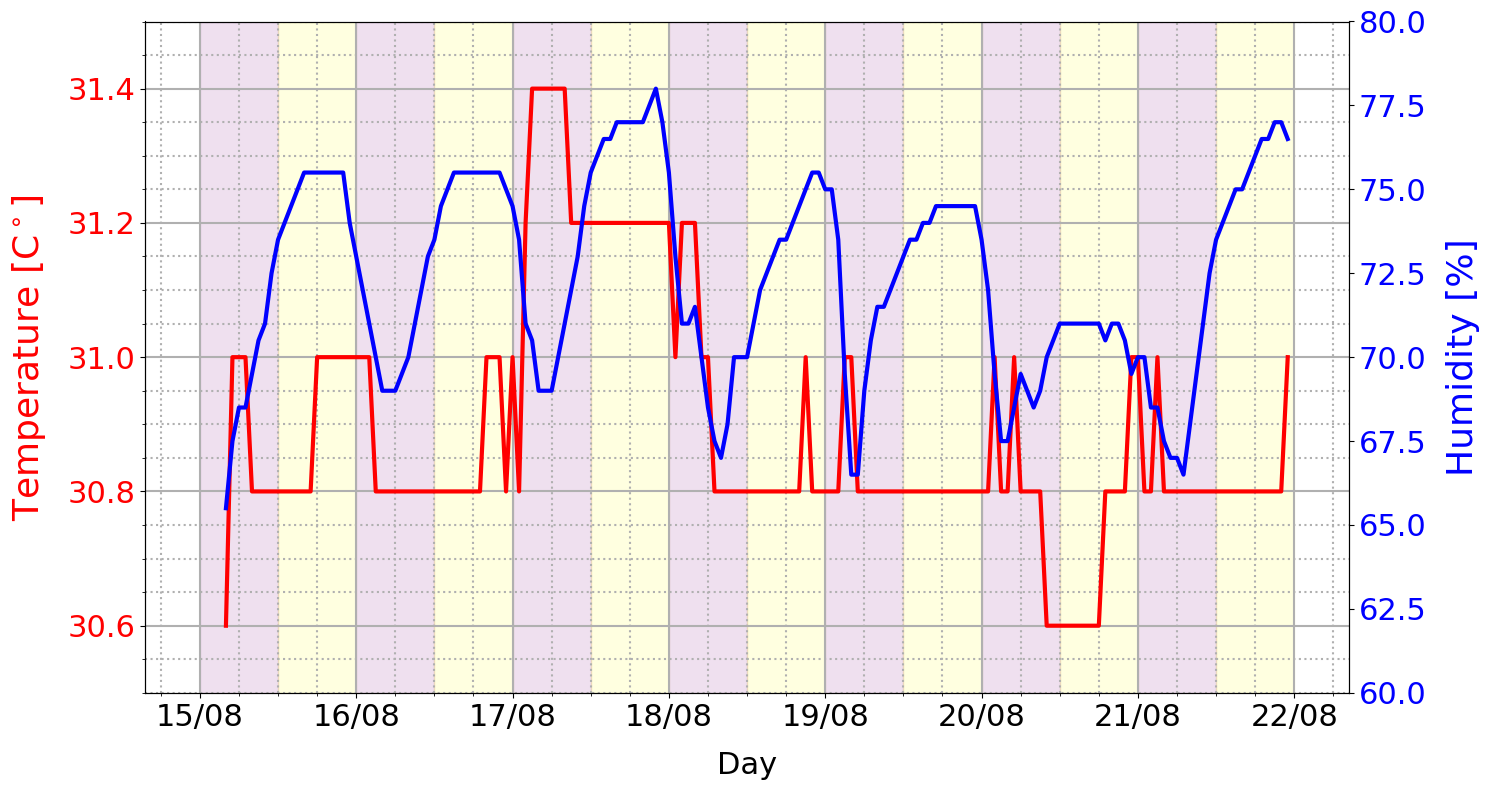

In [5]:
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

fig, ax = plt.subplots(figsize = (15, 8))
sns.lineplot(x=t_vals, y = temp1_hourly, ax = ax, color='red', lw=3)

ax.set_xticks([-4,  20,  44,  68,  92,  116,  140, 164], labels = ["15/08", "16/08","17/08","18/08","19/08","20/08","21/08","22/08"], fontsize = 22)

ax.set_ylim(30.5,31.5)

ax.set_xlabel("Day", fontsize = 22, labelpad = 14)

ax2 = ax.twinx()

ax2.set_ylim(60,80)

sns.lineplot(x=t_vals, y = hum1_hourly, ax = ax2, color='blue',lw=3)

ax.set_ylabel(r"Temperature [C$^\circ$]", color = 'red', fontsize=26, labelpad=14)
ax.tick_params(axis='y', labelcolor='red')

ax2.set_ylabel('Humidity [%]', color='blue', fontsize = 26, labelpad=14)
ax2.tick_params(axis='y', labelcolor='blue')

# Enable major grid
ax.grid(True, which='major', linestyle='-', linewidth=1.5)

# Enable minor grid (finer grid)
ax.grid(True, which='minor', linestyle=':', linewidth=1.5)
ax.minorticks_on()  # Turn on minor ticks

alpha = 0.12
ax.axvspan(-4, 8, color = 'purple', alpha = alpha)
ax.axvspan(8, 20, color = 'yellow', alpha = alpha)
ax.axvspan(20, 32, color = 'purple', alpha = alpha)
ax.axvspan(32, 44, color = 'yellow', alpha = alpha)
ax.axvspan(44, 56, color = 'purple', alpha = alpha)
ax.axvspan(56, 68, color = 'yellow', alpha = alpha)
ax.axvspan(68, 80, color = 'purple', alpha = alpha)
ax.axvspan(80, 92, color = 'yellow', alpha = alpha)
ax.axvspan(92, 104, color = 'purple', alpha = alpha)
ax.axvspan(104, 116, color = 'yellow', alpha = alpha)
ax.axvspan(116, 128, color = 'purple', alpha = alpha)
ax.axvspan(128, 140, color = 'yellow', alpha = alpha)
ax.axvspan(140, 152, color = 'purple', alpha = alpha)
ax.axvspan(152, 164, color = 'yellow', alpha = alpha)

fig.tight_layout()

In [8]:
temp_mean = np.mean(temp1_hourly)
temp_std  = np.std(temp1_hourly)
hum_mean  = np.mean(hum1_hourly)
hum_std   = np.std(hum1_hourly)

print("Mean Temp: ", temp_mean, temp_std)
print("Humidity Mean", hum_mean ,hum_std )

Mean Temp:  30.89268292682927 0.1826501973351121
Humidity Mean 72.35060975609755 2.9786741393105594


In [ ]:
np.mean()

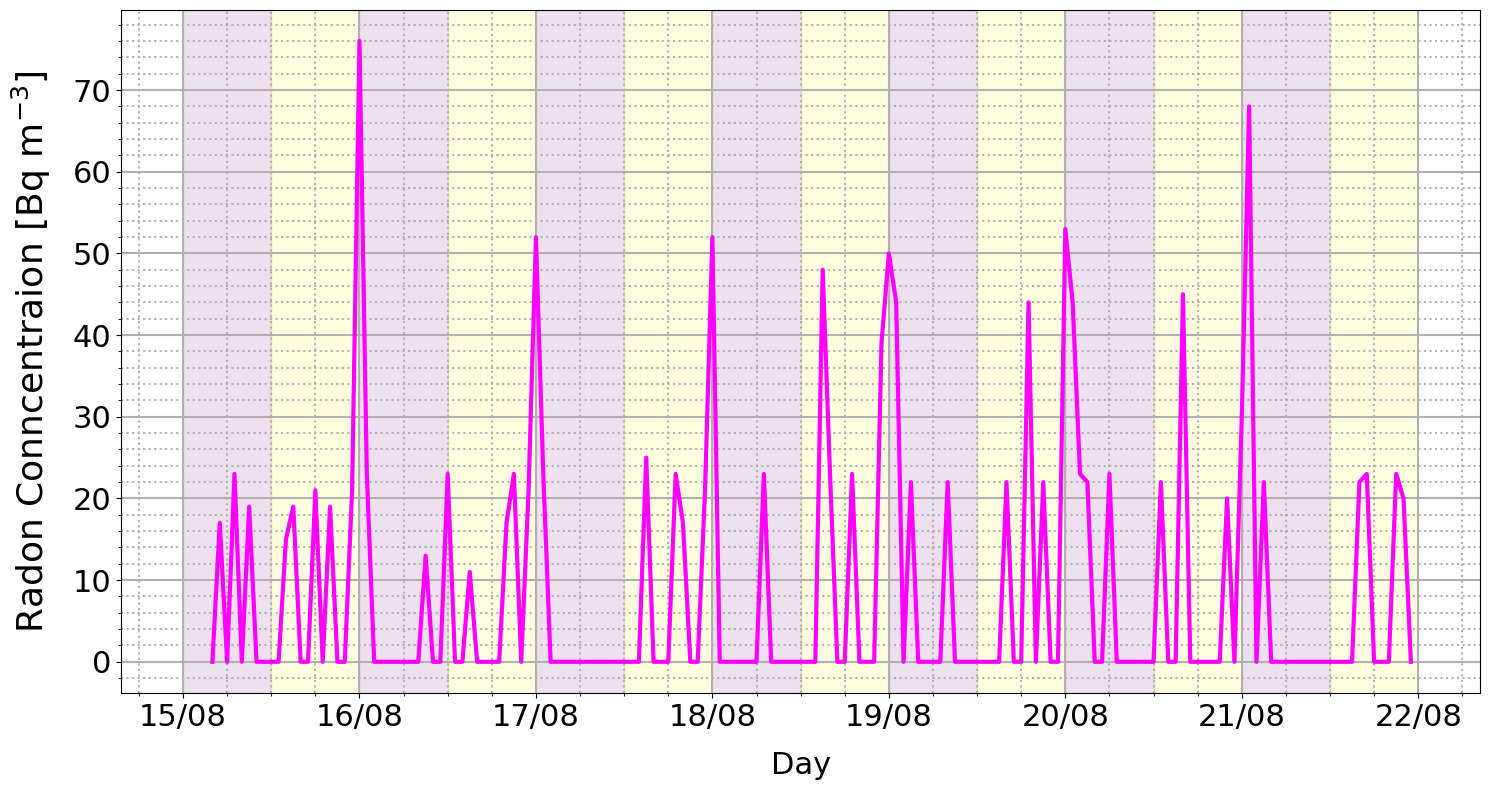

In [6]:
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

fig, ax = plt.subplots(figsize = (15, 8))
sns.lineplot(x=t_vals, y = radon1_hourly, ax = ax, color='magenta', lw=3)

ax.set_xticks([-4,  20,  44,  68,  92,  116,  140, 164], labels = ["15/08", "16/08","17/08","18/08","19/08","20/08","21/08","22/08"], fontsize = 22)

#ax.set_ylim(30.5,31.5)

ax.set_xlabel("Day", fontsize = 22, labelpad = 14)

#ax2 = ax.twinx()

#ax2.set_ylim(60,80)

#sns.lineplot(x=t_vals, y = hum1_hourly, ax = ax2, color='blue',lw=3)

ax.set_ylabel(r"Radon Conncentraion [Bq m$^{-3}$]", color = 'black', fontsize=26, labelpad=14)
ax.tick_params(axis='y', labelcolor='black')

#ax2.set_ylabel('Humidity [%]', color='blue', fontsize = 26, labelpad=14)
#ax2.tick_params(axis='y', labelcolor='blue')

# Enable major grid
ax.grid(True, which='major', linestyle='-', linewidth=1.5)

# Enable minor grid (finer grid)
ax.grid(True, which='minor', linestyle=':', linewidth=1.5)
ax.minorticks_on()  # Turn on minor ticks

alpha = 0.12
ax.axvspan(-4, 8, color = 'purple', alpha = alpha)
ax.axvspan(8, 20, color = 'yellow', alpha = alpha)
ax.axvspan(20, 32, color = 'purple', alpha = alpha)
ax.axvspan(32, 44, color = 'yellow', alpha = alpha)
ax.axvspan(44, 56, color = 'purple', alpha = alpha)
ax.axvspan(56, 68, color = 'yellow', alpha = alpha)
ax.axvspan(68, 80, color = 'purple', alpha = alpha)
ax.axvspan(80, 92, color = 'yellow', alpha = alpha)
ax.axvspan(92, 104, color = 'purple', alpha = alpha)
ax.axvspan(104, 116, color = 'yellow', alpha = alpha)
ax.axvspan(116, 128, color = 'purple', alpha = alpha)
ax.axvspan(128, 140, color = 'yellow', alpha = alpha)
ax.axvspan(140, 152, color = 'purple', alpha = alpha)
ax.axvspan(152, 164, color = 'yellow', alpha = alpha)

fig.tight_layout()

In [10]:
radon1_hourly

array([ 0., 17.,  0., 23.,  0., 19.,  0.,  0.,  0.,  0., 15., 19.,  0.,
        0., 21.,  0., 19.,  0.,  0., 21., 76., 23.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 13.,  0.,  0., 23.,  0.,  0., 11.,  0.,  0.,  0.,
        0., 17., 23.,  0., 21., 52., 23.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., 25.,  0.,  0.,  0., 23., 17.,
        0.,  0., 21., 52.,  0.,  0.,  0.,  0.,  0.,  0., 23.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., 48., 23.,  0.,  0., 23.,  0.,  0.,  0.,
       39., 50., 44.,  0., 22.,  0.,  0.,  0.,  0., 22.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 22.,  0.,  0., 44.,  0., 22.,  0.,  0., 53.,
       44., 23., 22.,  0.,  0., 23.,  0.,  0.,  0.,  0.,  0.,  0., 22.,
        0.,  0., 45.,  0.,  0.,  0.,  0.,  0., 20.,  0., 30., 68.,  0.,
       22.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       22., 23.,  0.,  0.,  0., 23., 20.,  0.])

In [15]:
radon_all     = np.array(df1.iloc[:, 2][19:], dtype=float)

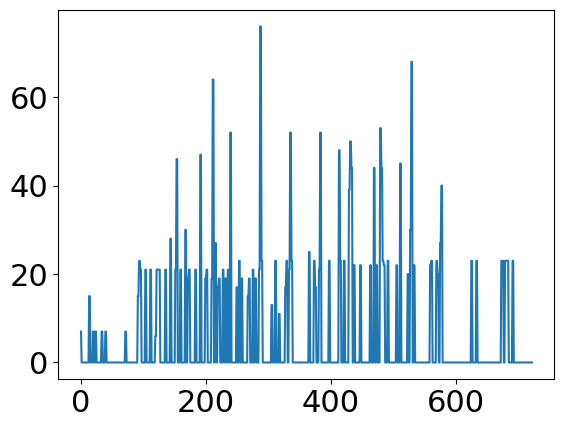

In [16]:
plt.plot(radon_all)